# 2.- Learn basic manipulation and mathematic operations on PyTorch tensors

## What is a tensor (PyTorch)?

A tensor is a multi-dimensional array. In PyTorch, this comes from a generalization of the notation of variables that exists on more than two dimensions.

*   zero-dimensional variables are points,
*   one-dimensional variables are vectors,
*   two-dimensional variables are matrices,
*   and three or more dimensional variables, are tensors.

In [ ]:
import torch

In [ ]:
x0 = torch.Tensor([7]) # This is a point
x0

In [ ]:
x1 = torch.Tensor([15, 64, 123]) # This is a vector
x1

In [ ]:
x2 = torch.Tensor([[3, 6, 5],
                   [7, 9, 12],
                   [10, 33, 1]]) # This is a matrix
x2

In [ ]:
x3 = torch.Tensor([[[[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]],
                    [[2, 0, 1],
                     [0, 2, 3],
                     [4, 1, 5]]]]) # This is a tensor
x3



---



Arithmetic operations are applied to each element inside the tensor

In [ ]:
# Define a tensor of any dimension
x = torch.Tensor([[1, 3, 2], [4, 5, 7]])
x

# Define "y" as two times "x" plus five

The same happens with functions, e.g., trigonometric functions

In [ ]:
# Apply a trigonometric function (e.g., sin, cos, tan) on "x"

Arithmetic operations between two tensors can be applied as well

In [ ]:
x = torch.Tensor([1, 3, 4, 7])
y = torch.Tensor([2, 5, 1, 1])

# Compute "z" as the sum of "x" and "y"

**Important** -- Check the shape of the tensors first!

In [ ]:
r = torch.Tensor([[1, 2], [4, 5]])
s = torch.Tensor([4, 5, 10, 11, 5])

t = r + s # This will generate an error because r and s does not have the same shape

Use the tensor's property *.shape* to know the shape of that tensor

In [ ]:
r.shape

### From Numpy to Torch
If you are familiar with Numpy's arrays, you can convert them into PyTorch's tensors as follows

In [ ]:
import numpy as np

In [ ]:
x_np = np.array([1, 2, 3, 4])

# Define "x_pt" as a PyTorch's Tensor version of "x_np"



---



# How are tensors used in Deep Learning?

We store images in form of two-dimensional tensors for black and white, gray-scale images, and as three-dimensional tensors for color images (RGB).

In [ ]:
import matplotlib.pyplot as plt
import skimage

In [ ]:
# Load some images as numpy arrays
im_bw = skimage.data.camera()
im_bw.shape

In [ ]:
plt.imshow(im_bw, cmap="gray")

In [ ]:
im_bw[:5, :5]

In [ ]:
im_color = skimage.data.astronaut()
im_color.shape

In [ ]:
plt.imshow(im_color)

In [ ]:
im_color[:5, :5, :]

For convenience, PyTorch's tensors are stored with the channels axis before the spatial (X, Y) axis.
So, lets permute the axes after converting the image to a PyTorch's tensor.

In [ ]:
x = torch.from_numpy(im_color)

# Permute the axes of "x", so we have the color axes first, then cast the type of "x" into float type

In [ ]:
print("Numpy original:", im_color.dtype)
print("PyTorch Tensor:", x.dtype)

Cast the type of data from integers to floating points, so we can apply functions that return continuous variables.

In [ ]:
# Get the mean, and standard deviation of the pixel values of "x"


In [ ]:
print("Numpy original:", im_color.dtype)
print("PyTorch Tensor:", x.dtype)

## Training with mini-batches of images

PyTorch can operate efficiently on multiple images at the same time.
To do that, we need to stack these images into a single tensor first.

That is because operations in PyTorch expect the images to have the following axes order **B,C,H,W**
1.   **B**: Batch size,
2.   **C**: Number of Channels,
3.   **H**: Height, and
4.   **W**: Width

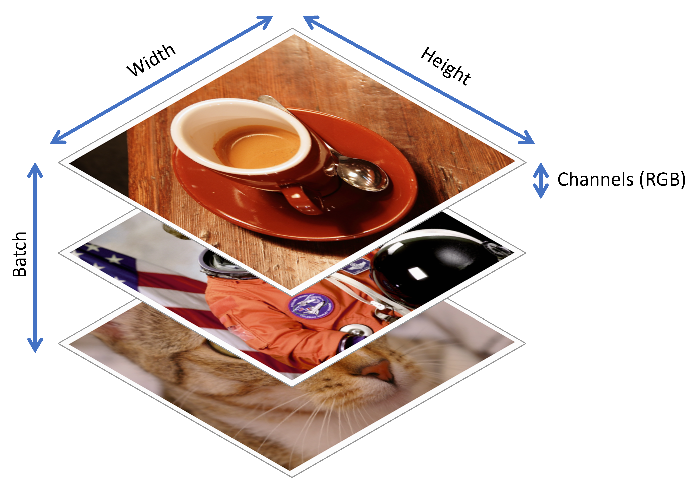

In [ ]:
im1 = skimage.data.astronaut()
x1 = torch.from_numpy(im1).permute(2, 0, 1)
x1 = x1.float()

im2 = skimage.data.cat()
x2 = torch.from_numpy(im2).permute(2, 0, 1)
x2 = x2.float()

print(x1.shape)
print(x2.shape)

Crop, resize, apply color transformations to images, so these are of the same shape and number of channels.

In [ ]:
# Take a patch of size 256x256 pixels from each image


# Stack the patches into a batch of tensors at dimension 0




---



# PyTorch's building blocks


Deep learning models are defined as hierarchical transformations arranged as *layers*.
Each *layer* takes an input (the original image, or from a previous layer) and  computes its output using some **operations** and **functions**.
Then that output is used as input for the next layer ...

## Convolution layers

The most common operation in DL models for image processing are Convolution operations.

![2D Convolution](https://upload.wikimedia.org/wikipedia/commons/8/85/Convolution_arithmetic_-_Full_padding_no_strides_transposed.gif)

The animation shows the convolution of a 7x7 pixels input image (bottom) with a 3x3 pixels kernel (moving window), that results in a 5x5 pixels output (top).

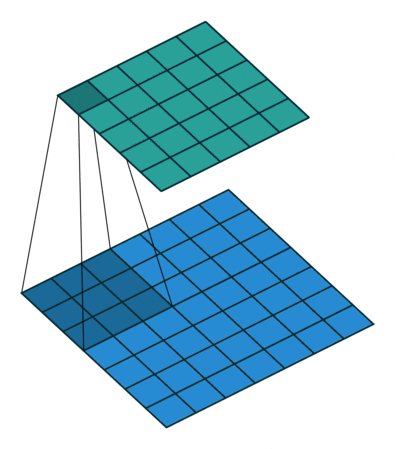

### The effect of convolution operations

In [ ]:
kernel = torch.Tensor([[
    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 0]], # This part of the Kernel will operate on the Red channel of the images

    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 0]], # This part of the Kernel will operate on the Green channel of the images

    [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]], # This part of the Kernel will operate on the Blue channel of the images
    ]])

In [ ]:
#@title Result of the convolution between an image and the kernel
im = skimage.data.cat()

x = torch.from_numpy(im).float().permute(2, 0, 1)

# We add a "dummy" dimension to our tensor "x" so it has the BCHW axes
x = x[None, ...]

# Use the con2d function from torch.nn.functional
output = torch.nn.functional.conv2d(x, kernel, padding=0)
output.shape

plt.imshow(output[0, 0], cmap="gray")

Experiment with different values and shapes of the kernel
https://en.wikipedia.org/wiki/Kernel_(image_processing)



---



### Convolution layers from torch.nn module

In [ ]:
# Use the Conv2d module from torch.nn to define a learnable convolution layer
conv_1 =

In [ ]:
y = conv_1(x)
y.shape

In [ ]:
#@title Visualize the output of the randomly initialized kernel of the convolution layer
plt.imshow((y[0].detach().permute(1, 2, 0) - y[0].detach().min()) / (y[0].detach().max() - y[0].detach().min()))

## Linear layers

These layers perform matrix-matrix, and matrix-vector operations on its corresponding inputs. Linear layers are commonly used in final layers to obtain the output of the model.

For classification tasks, these layers project a multi-channel feature map into a single prediction of the image's class.

![Inception V3](https://wngaw.github.io/images/inception_v3_architecture.png)

In object detection and localization problems, these layers generate the detection confidence and bounding box of the object.

![YOLO](https://viso.ai/wp-content/uploads/2021/02/yolo-object-detection.jpg)

### Linear layers from torch.nn

In [ ]:
# Use the Linear module from torch.nn to define a linear operation
lin_1 =



---



## Non-linear activation layers

These layers are integrated to add non-linear behavior into the neural network.

In [ ]:
# Define a Rectified Linear Unit (ReLU) layer using the torch.nn module
relu_1 =

A list of activation layers here https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity



---



## Pooling layers

This kind of layers are used to downsample the current feature maps which helps to summarize information from large regions into a couple of pixels.

There are two common pooling operations: maximum pooling, and average pooling.

Maximum pooling looks for the maximum value in a region and returns it as a single pixel. While average pooling computes the average value for that region.

In [ ]:
# Define a Maximum Pooling layer from torch.nn module
max_pool =